<a href="https://colab.research.google.com/github/TETRAWasTaken/CCN-on-CIFAR10/blob/main/STAIML_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install tensorflow

In [ ]:
pip install pushbullet.py

In [ ]:
!pip install scikit-learn

In [ ]:
import numpy as np
import cv2
from scipy import datasets
import matplotlib.pyplot as plt

# **Machine Learning Using CNN and DNN**

# Convolutions
Convolution is the process of applying a filter on the image to highlights its important details

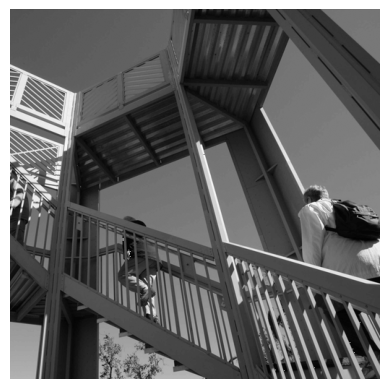

In [ ]:
# Performing convolution on a specific image to demonstrate the process
i = datasets.ascent() # Image

# Using Matplot to show the Image
plt.grid(False)
plt.gray() # Black Anf White Image
plt.axis('off') # To not the show the Coodinate Axes
plt.imshow(i)
plt.show()

The Image is stored as a numpy array, so the the values of each pixel is accesible just by looping over the Array

In [ ]:
# Creating a copy of the image to work on
i_convoluted = np.copy(i)

# Extracting the length of X and Y dimensions of the image
size_x = int(i_convoluted.shape[0])
size_y = int(i_convoluted.shape[1])

Creating a Convolution Matrix (3x3) aka Kernel, which will be the filter to extract details from the image

In [ ]:
filter = [[-1,-2,-1],[0,0,0],[1,2,1]]
weight = 1

All the digits in a filter should add up to 0 or 1, hence if they don't, we use weight to normalize them.

In [ ]:
# Creating a function to Clamp the values between 0-255
def assingpix(pix):
  if(pix<0):
    pix = 0
    return int(pix)
  if(pix>255):
    pix = 255
    return int(pix)
  else:
    return int(pix)

# Applying the filter over each pixel of the image
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
    pix = 0.0
    pix = pix + (int(i[x - 1, y-1]) * filter[0][0])
    pix = pix + (int(i[x, y-1]) * filter[0][1])
    pix = pix + (int(i[x + 1, y-1]) * filter[0][2])
    pix = pix + (int(i[x-1, y]) * filter[1][0])
    pix = pix + (int(i[x, y]) * filter[1][1])
    pix = pix + (int(i[x+1, y]) * filter[1][2])
    pix = pix + (int(i[x-1, y+1]) * filter[2][0])
    pix = pix + (int(i[x, y+1]) * filter[2][1])
    pix = pix + (int(i[x+1, y+1]) * filter[2][2])
    pix = pix * weight

    i_convoluted[x,y] = assingpix(pix)


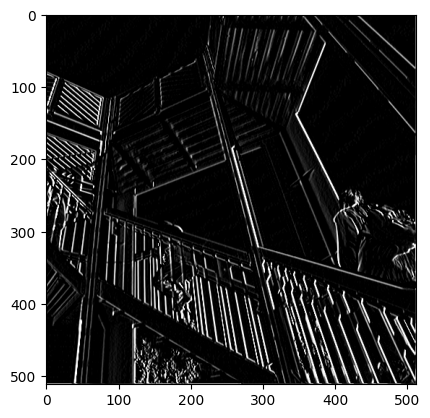

In [ ]:
# Plotting the Convoluted Image
plt.gray()
plt.grid(False)
plt.imshow(i_convoluted)
plt.show()

# Pooling
Pooling is the process of reducing overall information on the image while keeping the important details intact

In [ ]:
# Applying Pooling over the image to demonstrate the process
# We will be Applying MAX Pooling, which takes the maximum pixel value within the matrix of pixels

new_x = int(size_x/2)
new_y = int(size_y/2)

newImage = np.zeros((new_x, new_y)) # Creating an empty array of the size of the new Image

for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_convoluted[x, y])
    pixels.append(i_convoluted[x+1, y])
    pixels.append(i_convoluted[x, y+1])
    pixels.append(i_convoluted[x+1, y+1])
    newImage[int(x/2),int(y/2)] = max(pixels)

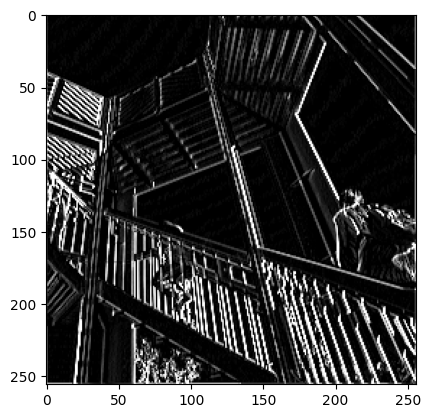

In [ ]:
# Plotting the new image
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()

# **Building a Model**

We will be using Tensor Flow library for efficiently building a Image Classification model

### Importing Required Packages

In [ ]:
import sklearn
from sklearn import metrics
import os
import seaborn as sns
import itertools
from tensorflow.keras.datasets import cifar10
import tensorflow as tf

from pushbullet import Pushbullet

api_key = "o.McaYTyMXyWMgQ2k9MmF3DlJAilOl5Ny6"
pb = Pushbullet(api_key)

%matplotlib inline

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
# Check if a GPU is available
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPU(s) found:")
    for gpu in gpus:
        print(f"  - Name: {gpu.name}, Logical devices: {tf.config.list_logical_devices('GPU')}")
else:
    print("No GPU found. Make sure you selected GPU runtime.")

GPU(s) found:
  - Name: /physical_device:GPU:0, Logical devices: [LogicalDevice(name='/device:GPU:0', device_type='GPU')]


In [ ]:
title = "Colab Notification"
body = "Initiating Model Building Process"
push = pb.push_note(title, body)

In [ ]:
# Defining the enviroment and global variables
batch_size = 32
num_classes = 10
epochs = 100

In [ ]:
# Loading the CIFAR-10 datasets

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [ ]:
# Data Normalisation

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

### Defining the Model, and setting up the neuron layers, for Convolutions and Pooling

In [ ]:
# Defining the Model

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', input_shape = x_train.shape[1:]),
                             tf.keras.layers.Activation('relu'),
                             tf.keras.layers.Conv2D(32, (3, 3)),
                             tf.keras.layers.Activation('relu'),
                             tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                             tf.keras.layers.Dropout(0.25),

                             tf.keras.layers.Conv2D(64, (3, 3), padding = 'same'),
                             tf.keras.layers.Activation('relu'),
                             tf.keras.layers.Conv2D(64, (3, 3)),
                             tf.keras.layers.Activation('relu'),
                             tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                             tf.keras.layers.Dropout(0.25),

                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512),
                             tf.keras.layers.Activation('relu'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(num_classes),
                             tf.keras.layers.Activation('softmax')])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,250,858 (4.77 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Adding Optimizer algorithms

opt = tf.keras.optimizers.RMSprop(learning_rate = 0.0001)

In [ ]:
# Initiating the Training

model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['accuracy'])

### Initiating the Model Training, over 100 epochs

In [ ]:
title = "Colab Notification"
body = "Initiating Model Building"
push = pb.push_note(title, body)

In [ ]:
history = None  # For recording the history of trainning process.
print('Not using data augmentation.')
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    shuffle=True)


title = "Colab Notification"
body = "Model Training Finished"
push = pb.push_note(title, body)

Not using data augmentation.
Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.2471 - loss: 2.0208 - val_accuracy: 0.4285 - val_loss: 1.5672
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4310 - loss: 1.5620 - val_accuracy: 0.5127 - val_loss: 1.3705
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4929 - loss: 1.3962 - val_accuracy: 0.5531 - val_loss: 1.2602
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5353 - loss: 1.3090 - val_accuracy: 0.5778 - val_loss: 1.1915
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5595 - loss: 1.2320 - val_accuracy: 0.6104 - val_loss: 1.1028
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5937 - loss: 1.1470 - val_accuracy: 0.6065 - val_loss: 1.1156
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6116 - loss: 1.0953 - val_accuracy: 0.6442 - val_loss: 1.0054
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/s

This Training Process would have taken around 8 hours to complete over a CPU,
But, took only 14.6 muinutes, when training over a GPU

### Plotting the Model History for better understanding of the Model Training Process and Diagnosis

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


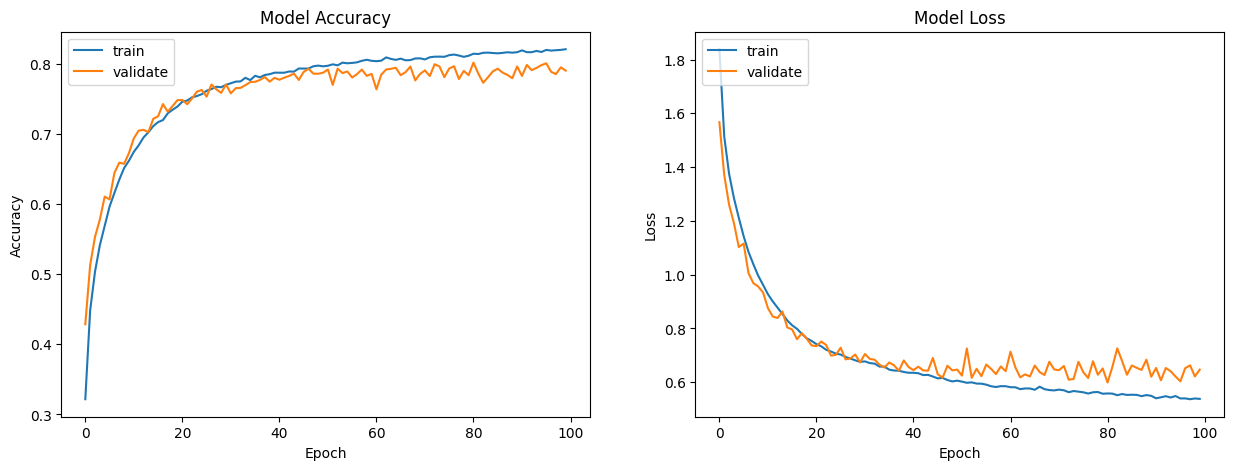

In [ ]:
def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

### Accesing the Trained Model and Making predictions to check for accuracy and working

In [ ]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(x_test)

title = "Colab Notification"
body = "Model Testing and Predictions Finished"
push = pb.push_note(title, body)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7893 - loss: 0.6423
Test loss: 0.6467960476875305
Test accuracy: 0.789900004863739
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


### Some Examples of the Model Predictions

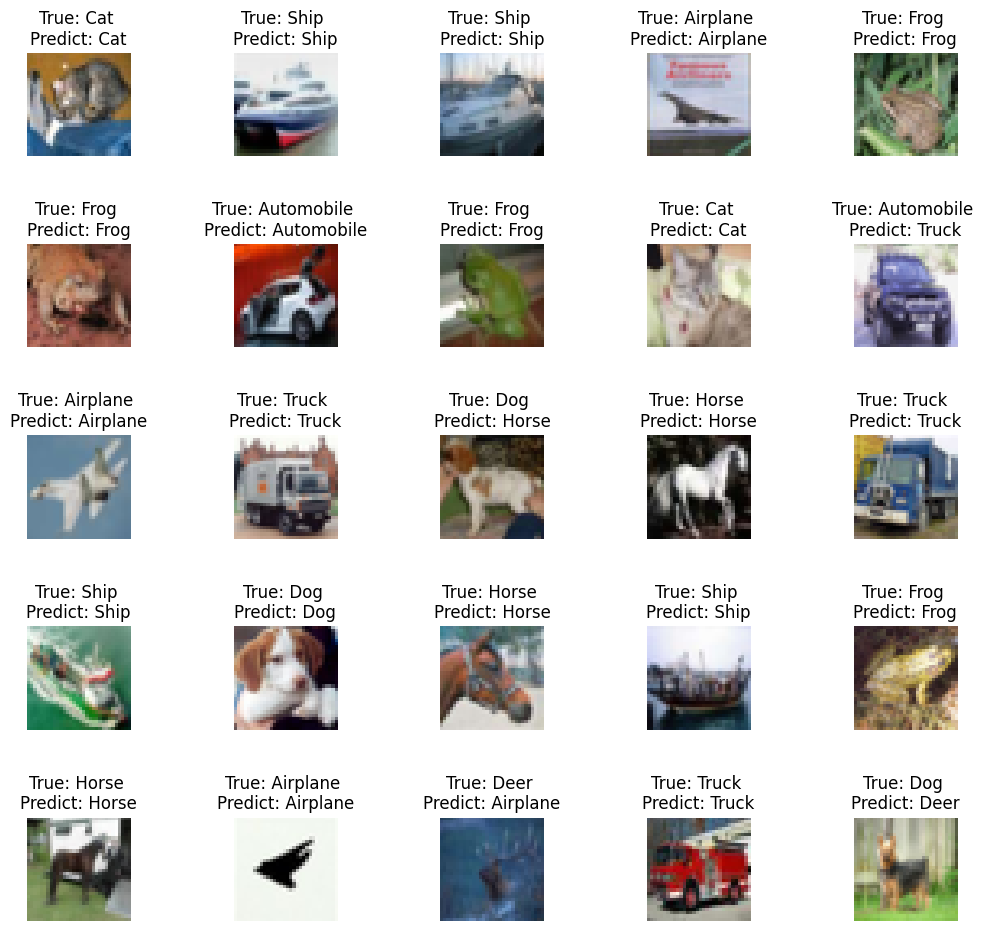

In [ ]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
Y_true = np.argmax(y_test, axis=1)
Y_pred_classes = np.argmax(pred, axis=1)

R = 5
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (labels[Y_true[i]], labels[Y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

### Saving the Model to google drive for future use and permanent storage

In [ ]:
save_dir = "/content/drive/MyDrive/CIFAR-10_Model"
model_name = 'keras_cifar10_trained_model.keras'

# Save model and weights

model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

title = "Colab Notification"
body = "Model Saved Succesfully to Google Drive"
push = pb.push_note(title, body)

Saved trained model at /content/drive/MyDrive/CIFAR-10_Model/keras_cifar10_trained_model.keras 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7893 - loss: 0.6423
Test loss: 0.6467960476875305
Test accuracy: 0.789900004863739


# Thankyou for Going throught the Notebook

# EXTRASS

In [ ]:
/content/drive/MyDrive/CIFAR-10_Model/keras_cifar10_trained_model.keras

In [ ]:
# Loading the model

loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/CIFAR-10_Model/keras_cifar10_trained_model.keras")
loaded_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,501,718 (9.54 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,250,860 (4.77 MB)

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
rand_image = image.load_img("/content/61cEbiRrO7L.jpg")
img = image.img_to_array(rand_image, dtype=np.uint8)
img = np.array(img)/255

In [ ]:
def manual_pooling(image):
  size_x = image.shape[0]
  size_y = image.shape[1]
  channel = image.shape[2]

  new_x = int(size_x/2)
  new_y = int(size_y/2)

  newImage = np.zeros((new_x, new_y, channel)) # Creating an empty array of the size of the new Image

  for c in range(channel):
    for x in range(0, size_x, 2):
      for y in range(0, size_y, 2):
        pixels = []
        pixels.append(image[x, y, c])
        pixels.append(image[x+1, y, c])
        pixels.append(image[x, y+1, c])
        pixels.append(image[x+1, y+1, c])
        newImage[int(x/2),int(y/2),c] = max(pixels)

  return newImage

def pooler(n, image):
  for i in range(n):
    image = manual_pooling(image)
  return image

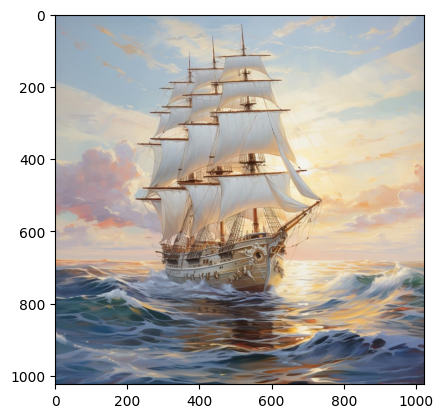

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
new_img = pooler(5, img)
test_img = np.expand_dims(new_img, axis=0)

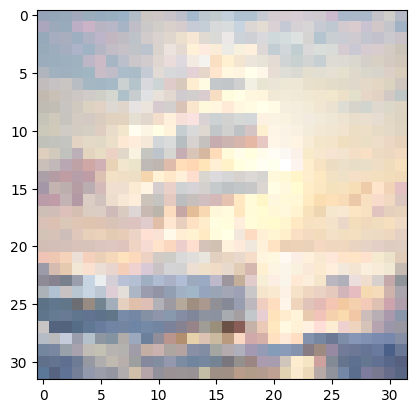

In [ ]:
plt.imshow(new_img)
plt.show()

In [ ]:
prediction = loaded_model.predict(test_img)
best_class = np.argmax(prediction, axis=1)
print(best_class)
for i in labels:
  if labels.index(i)==best_class:
    print(i)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[8]
Ship
